 Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


 Load Dataset

In [ ]:
url = "D:/Downloads/Mall_Customers.csv/Churn_Modelling.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Summary


In [5]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:

# Check null values
print("Null values:\n", df.isnull().sum())

Null values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


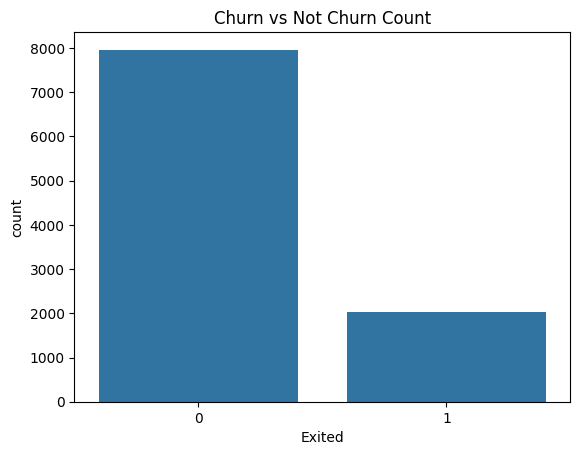

In [7]:
# Churn distribution
sns.countplot(x='Exited', data=df)
plt.title("Churn vs Not Churn Count")
plt.show()

In [8]:
# Percentage
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(f"\nChurn Rate:\n{churn_rate}")


Churn Rate:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


 Data Preprocessing

In [9]:
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


Feature and Target

In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (10000, 11)
Target shape: (10000,)


Split Dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


 Feature Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Build ANN Model

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

Setup Callbacks

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

callbacks = [early_stop, checkpoint]


Train Model

In [19]:
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks,
                    verbose=1)


Epoch 1/100
195/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 0.5421

200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7689 - loss: 0.5414 - val_accuracy: 0.7981 - val_loss: 0.4512
Epoch 2/100
180/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4830

200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7899 - loss: 0.4816 - val_accuracy: 0.8075 - val_loss: 0.4378
Epoch 3/100
186/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4541

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.4542 - val_accuracy: 0.8181 - val_loss: 0.4314
Epoch 4/100
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4506

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7965 - loss: 0.4506 - val_accuracy: 0.8213 - val_loss: 0.4237
Epoch 5/100
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8096 - loss: 0.4413

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8096 - loss: 0.4411 - val_accuracy: 0.8269 - val_loss: 0.4116
Epoch 6/100
182/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.4220

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.4220 - val_accuracy: 0.8375 - val_loss: 0.3982
Epoch 7/100
183/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.4136

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8168 - loss: 0.4142 - val_accuracy: 0.8494 - val_loss: 0.3864
Epoch 8/100
184/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - loss: 0.3980

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8238 - loss: 0.3987 - val_accuracy: 0.8525 - val_loss: 0.3757
Epoch 9/100
184/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.3962

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8281 - loss: 0.3968 - val_accuracy: 0.8519 - val_loss: 0.3672
Epoch 10/100
183/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.3948

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8280 - loss: 0.3956 - val_accuracy: 0.8625 - val_loss: 0.3621
Epoch 11/100
185/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8272 - loss: 0.3967

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.3967 - val_accuracy: 0.8575 - val_loss: 0.3598
Epoch 12/100
186/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.3866

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8337 - loss: 0.3866 - val_accuracy: 0.8619 - val_loss: 0.3548
Epoch 13/100
192/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.3854

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8337 - loss: 0.3852 - val_accuracy: 0.8619 - val_loss: 0.3507
Epoch 14/100
181/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8458 - loss: 0.3691

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.3703 - val_accuracy: 0.8656 - val_loss: 0.3502
Epoch 15/100
186/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.3908

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0.3899 - val_accuracy: 0.8669 - val_loss: 0.3468
Epoch 16/100
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.3817

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8308 - loss: 0.3815 - val_accuracy: 0.8656 - val_loss: 0.3466
Epoch 17/100
183/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3692

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8465 - loss: 0.3701 - val_accuracy: 0.8637 - val_loss: 0.3461
Epoch 18/100
189/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 0.3781

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8393 - loss: 0.3778 - val_accuracy: 0.8619 - val_loss: 0.3429
Epoch 19/100
184/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3830

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8403 - loss: 0.3821 - val_accuracy: 0.8656 - val_loss: 0.3412
Epoch 20/100
188/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.3691

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8444 - loss: 0.3693 - val_accuracy: 0.8662 - val_loss: 0.3401
Epoch 21/100
187/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3645

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8475 - loss: 0.3651 - val_accuracy: 0.8662 - val_loss: 0.3385
Epoch 22/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3577 - val_accuracy: 0.8669 - val_loss: 0.3396
Epoch 23/100
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.3601

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3604 - val_accuracy: 0.8694 - val_loss: 0.3359
Epoch 24/100
180/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3616

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8473 - loss: 0.3620 - val_accuracy: 0.8687 - val_loss: 0.3351
Epoch 25/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3532 - val_accuracy: 0.8694 - val_loss: 0.3366
Epoch 26/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8475 - loss: 0.3659 - val_accuracy: 0.8694 - val_loss: 0.3357
Epoch 27/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.3564 - val_accuracy: 0.8706 - val_loss: 0.3361
Epoch 28/100
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3676

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8523 - loss: 0.3675 - val_accuracy: 0.8687 - val_loss: 0.3344
Epoch 29/100
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.3754

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8430 - loss: 0.3752 - val_accuracy: 0.8700 - val_loss: 0.3333
Epoch 30/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3571 - val_accuracy: 0.8675 - val_loss: 0.3364
Epoch 31/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3443 - val_accuracy: 0.8687 - val_loss: 0.3334
Epoch 32/100
197/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3570

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3571 - val_accuracy: 0.8687 - val_loss: 0.3307
Epoch 33/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3504 - val_accuracy: 0.8681 - val_loss: 0.3315
Epoch 34/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8432 - loss: 0.3663 - val_accuracy: 0.8694 - val_loss: 0.3332
Epoch 35/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.3553 - val_accuracy: 0.8700 - val_loss: 0.3316
Epoch 36/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8346 - loss: 0.3728 - val_accuracy: 0.8694 - val_loss: 0.3309
Epoch 37/100
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3675

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8442 - loss: 0.3671 - val_accuracy: 0.8687 - val_loss: 0.3302
Epoch 38/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.3537 - val_accuracy: 0.8725 - val_loss: 0.3309
Epoch 39/100
184/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.3670

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8471 - loss: 0.3665 - val_accuracy: 0.8662 - val_loss: 0.3294
Epoch 40/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3694 - val_accuracy: 0.8687 - val_loss: 0.3295
Epoch 41/100
184/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8553 - loss: 0.3468

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.3476 - val_accuracy: 0.8731 - val_loss: 0.3290
Epoch 42/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3382 - val_accuracy: 0.8700 - val_loss: 0.3312
Epoch 43/100
191/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.3635

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.3632 - val_accuracy: 0.8706 - val_loss: 0.3288
Epoch 44/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3524 - val_accuracy: 0.8719 - val_loss: 0.3298
Epoch 45/100
190/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3572

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3570 - val_accuracy: 0.8706 - val_loss: 0.3287
Epoch 46/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8527 - loss: 0.3560 - val_accuracy: 0.8725 - val_loss: 0.3288
Epoch 47/100
185/200 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8520 - loss: 0.3628

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8522 - loss: 0.3623 - val_accuracy: 0.8744 - val_loss: 0.3271
Epoch 48/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3582

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8501 - loss: 0.3582 - val_accuracy: 0.8737 - val_loss: 0.3263
Epoch 49/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3573 - val_accuracy: 0.8731 - val_loss: 0.3280
Epoch 50/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8486 - loss: 0.3608 - val_accuracy: 0.8731 - val_loss: 0.3274
Epoch 51/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.3473 - val_accuracy: 0.8719 - val_loss: 0.3280
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3442 - val_accuracy: 0.8712 - val_loss: 0.3267
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3463 - val_accuracy: 0.8725 - val_loss: 0.3275
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.3471 - val_accuracy: 0.8700 - val_loss: 0.3274
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8567 - loss: 0.3498 - val_accuracy:

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8605 - loss: 0.3532 - val_accuracy: 0.8737 - val_loss: 0.3251
Epoch 59/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.3438 - val_accuracy: 0.8731 - val_loss: 0.3276
Epoch 60/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3526 - val_accuracy: 0.8731 - val_loss: 0.3253
Epoch 61/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.3382 - val_accuracy: 0.8725 - val_loss: 0.3260
Epoch 62/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3485 - val_accuracy: 0.8719 - val_loss: 0.3259
Epoch 63/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8562 - loss: 0.3570 - val_accuracy: 0.8737 - val_loss: 0.3266
Epoch 64/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8564 - loss: 0.3552 - val_accuracy: 0.8731 - val_loss: 0.3294
Epoch 65/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3399 - val_accuracy:

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8479 - loss: 0.3631 - val_accuracy: 0.8737 - val_loss: 0.3245
Epoch 68/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8549 - loss: 0.3469 - val_accuracy: 0.8756 - val_loss: 0.3263
Epoch 69/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3513 - val_accuracy: 0.8725 - val_loss: 0.3260
Epoch 70/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3538 - val_accuracy: 0.8725 - val_loss: 0.3263
Epoch 71/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3493 - val_accuracy: 0.8725 - val_loss: 0.3258
Epoch 72/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8564 - loss: 0.3433 - val_accuracy: 0.8731 - val_loss: 0.3262
Epoch 73/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3496 - val_accuracy: 0.8744 - val_loss: 0.3248
Epoch 74/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8611 - loss: 0.3329 - val_accuracy:

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3501 - val_accuracy: 0.8737 - val_loss: 0.3231
Epoch 77/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3405 - val_accuracy: 0.8712 - val_loss: 0.3243
Epoch 78/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3499 - val_accuracy: 0.8700 - val_loss: 0.3261
Epoch 79/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3462 - val_accuracy: 0.8744 - val_loss: 0.3260
Epoch 80/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.3520 - val_accuracy: 0.8712 - val_loss: 0.3241
Epoch 81/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3539 - val_accuracy: 0.8737 - val_loss: 0.3237
Epoch 82/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8652 - loss: 0.3386 - val_accuracy: 0.8719 - val_loss: 0.3238
Epoch 83/100
185/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3485

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3481 - val_accuracy: 0.8725 - val_loss: 0.3215
Epoch 84/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3479 - val_accuracy: 0.8725 - val_loss: 0.3246
Epoch 85/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8590 - loss: 0.3438 - val_accuracy: 0.8719 - val_loss: 0.3220
Epoch 86/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3426 - val_accuracy: 0.8731 - val_loss: 0.3231
Epoch 87/100
183/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.3414

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.3414 - val_accuracy: 0.8744 - val_loss: 0.3215
Epoch 88/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8634 - loss: 0.3419 - val_accuracy: 0.8725 - val_loss: 0.3238
Epoch 89/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8517 - loss: 0.3446 - val_accuracy: 0.8731 - val_loss: 0.3225
Epoch 90/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.3371 - val_accuracy: 0.8712 - val_loss: 0.3246
Epoch 91/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3392 - val_accuracy: 0.8694 - val_loss: 0.3269
Epoch 92/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3517 - val_accuracy: 0.8744 - val_loss: 0.3240
Epoch 93/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8571 - loss: 0.3404 - val_accuracy: 0.8731 - val_loss: 0.3244
Epoch 94/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8539 - loss: 0.3372 - val_accuracy:

Plot Accuracy and Loss

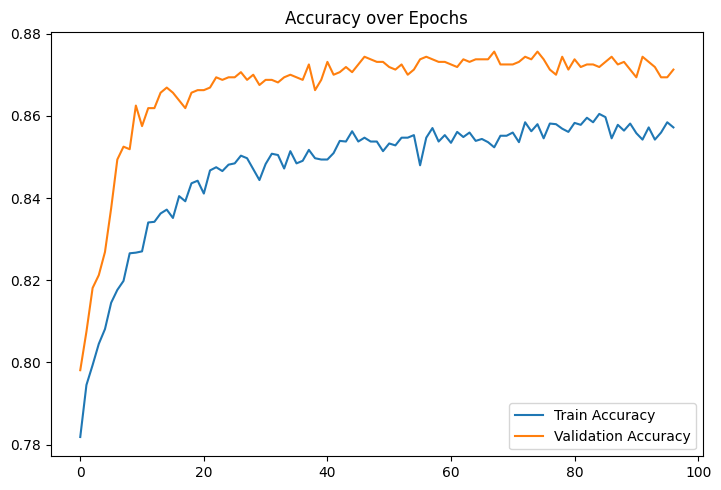

In [22]:
# Accuracy
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.tight_layout()
plt.show()

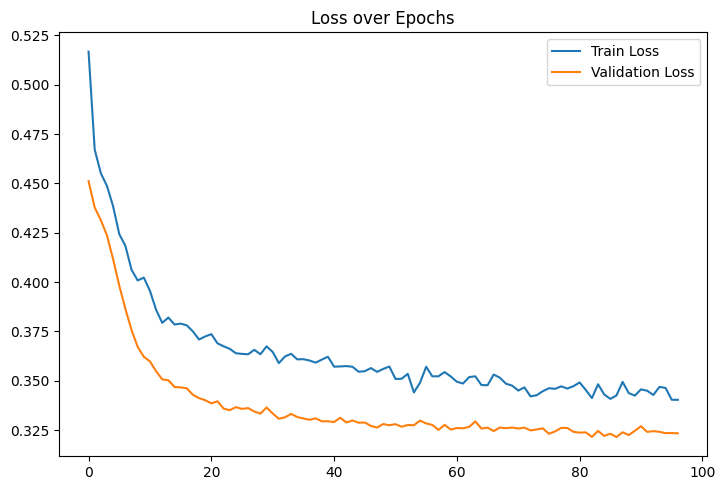

In [23]:
#loss curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.tight_layout()
plt.show()

Evaluate Model

In [24]:
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
acc = accuracy_score(y_test, y_pred_class)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8620


In [26]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



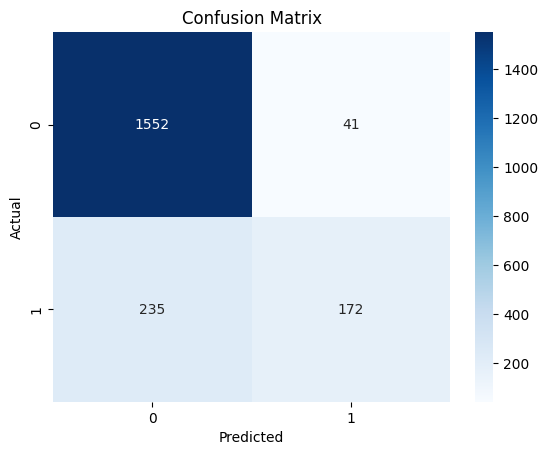

In [27]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Custom Prediction Example

In [28]:
# Predict on a sample test record
sample = X_test_scaled[0].reshape(1, -1)
sample_pred = model.predict(sample)

print(f"Predicted churn probability: {sample_pred[0][0]:.4f}")
print("Customer will churn" if sample_pred[0][0] > 0.5 else "Customer will stay")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted churn probability: 0.0227
Customer will stay
